# CIS 9
# Supervised Learning: Linear Regression 

Reading
<br>Think Stats: Correlation (Chapter 9)
- 9.1 to 9.4
- 9.7 to 9.8

Python Data Handbook Chapter 5: Linear Regression
- Simple Linear Regression

A common type of supervised learning is a regression problem. 
- A regression, or regression predictive modeling, is the task of approximating a mapping function _f_  from a set of input features _X_  to some output labels _y_, such that when a new set of X features is presented, the function f can accurately predict the outcome y.
- When the function f is a linear function, then it is a linear regression. 
- In a linear regression problem, the features X are the _independent variables_ and the labels _y_ are the _dependent variable_ because they're dependent on X.
- The output y is quantitative data, a number that denotes a quantity such as a size or an amount within a range of values.
- A regression with 1 variable X is a simple regression problem.
A regression with 2 or more variables X1, X2... is a multiple regression problem.

__Simple linear regression__

We start with a small dataset of package delivery time data (source: https://www.kaggle.com/gaurav9712/delivery-time). 
<br>The dataset has 2 columns of data: the sorting time and the delivery time. The sorting time is the time it takes to send the package out to delivery, and the delivery time is the time from when the package leaves the warehouse to the time it reaches the destination.
<br>We want to see if we can predict the delivery time based on the sorting time. The sorting time is the X input, and the delivery time is the y output.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

1. Read data from `delivery.csv` into a DataFrame. Inpect the data by printing the number of rows and columns of the DataFrame, and print the first 5 lines of the DataFrame.

In [2]:
d = pd.read_csv('delivery.csv')
print(d.shape)
d.head()

(21, 2)


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


2. Check whether there is any correlation between the sorting time and delivery time
<br>Recall that a scatterplot can show correlation.

Text(0, 0.5, 'Delivery time')

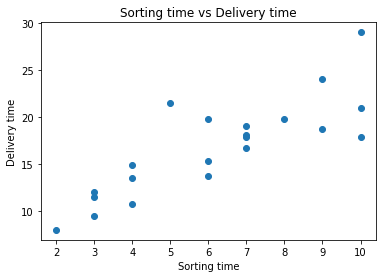

In [3]:
# a. Start by shortening the column labels to Delivery and Sorting
d.columns=['Delivery','Sorting']
# b. plot the data to check correlation
plt.scatter(d.Sorting,d.Delivery)    
plt.title("Sorting time vs Delivery time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

3. It looks like there is correlation, as the sorting time increases, the delivery time also increases. This means we can probably use linear regression as an estimator.
<br>Create the linear regression estimator

In [4]:
import sklearn.linear_model as lm

regr = lm.LinearRegression()

4. From the dataset, create the X DataFrame with the Sorting column, and create the y Series with the Delivery column

In [5]:
X = d.drop(columns=['Delivery'])
y = d.Delivery

5. Train the estimator

In [6]:
regr = regr.fit(X, y)

6. Print the _coefficients_ (the m value) and the _intercepts_ (the b value) of y = mx + b

In [7]:
print('Coefficients:', regr.coef_)
print('Intercepts:', regr.intercept_)

Coefficients: [1.6490199]
Intercepts: 6.58273397199706


7. With the coefficient and intercept values, plot the linear regression line that fits the scatter plot

Text(0, 0.5, 'Delivery time')

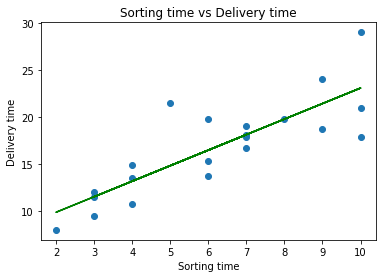

In [8]:
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.scatter(d.Sorting,d.Delivery)    
plt.title("Sorting time vs Delivery time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

8. Theoretically we can now predict the delivery time, given the sorting time of a package

In [9]:
# manually input an X value, then calculate y = mx + b
s_time = 12
d_time = regr.coef_ * s_time + regr.intercept_
print(d_time)
# or when there are many X values:
regr.predict([[12.0]])

[26.37097273]


array([26.37097273])

9. But is the prediction any good? Does the model work well for this type of data?
<br>It's common practice to take the set of data and break it up into 2 parts: training data and test data. This way we have multiple test data to test the estimator. We use the training data to train the estimator, and then use the test data to check the output.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15, 1) (6, 1) (15,) (6,)


10. Use the test data as input, then observe the predicted output with the actual data

In [11]:
y_pred = regr.predict(X_test)
# use a DataFrame to visually compare the 2 actual data and the predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,10.75,13.178814
0,21.00,23.072933
5,15.35,16.476853
7,9.50,11.529794
3,24.00,21.423913
13,11.50,11.529794


11. The actual and predicted data are not expected to be identical, but the closer they are the better our estimator is working. There are some common measurements of how well the estimator works:
- The root mean squared error, abbreviated as RMSE
- The R-squared value

In [12]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
deliveryMean = np.mean(d.Delivery)
print('Mean Delivery Time:', deliveryMean)
print('Percent error:', RMSE/deliveryMean*100)
print('R^2 value:', regr.score(X,y))

Root Mean Squared Error: 1.9245414493792674
Mean Delivery Time: 16.79095238095238
Percent error: 11.461776590841048
R^2 value: 0.6822714748417231


The RMSE is the square root of the mean of squared errors, where error is the difference between actual and predicted data points. It is the standard deviation of the difference between predicted data and actual data. A lower RSME is a better fit.

Another common measurement of how well the estimator works for a type of data is the $R^{2}$ value or the _coefficient of determination_. It is a percentage measurement of the difference between actual data and the linear regression line. An $R^{2}$ value of 1.0 (100%) is a perfect fit, and a value of 0.0 (0%) means there is no fit. 

Depending on the data that we work with, sometimes a low R value is acceptable if there are other significant trends. Likewise, a high R value doesn't necessarily mean the estimator is good. If the differences between actual data and the linear regression line mostly cancel each other out (such as +22.5 and -22.5) then the R value can be high and yet the difference (22.5) could be large compared to the mean of the data.

__More examples of simple linear regression__

We look at the data in `marketing.csv` (from https://www.kaggle.com/fayejavad/marketing-linear-multiple-regression). The data are 3 marketing budgets and the corresponding sales figures, in thousands of dollars.

13. Read data from `marketing.csv`, show the size of the data and the first 5 lines of data

In [13]:
d = pd.read_csv('marketing.csv')
print(d.shape)
d.head()

(171, 4)


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


We want to see if marketing the product on each of the 3 platforms have a direct effect on the sales figures.
<br>First we look at youtube.

14. Create a plot to see the correlation between the youtube and sales data

Text(0, 0.5, 'sales')

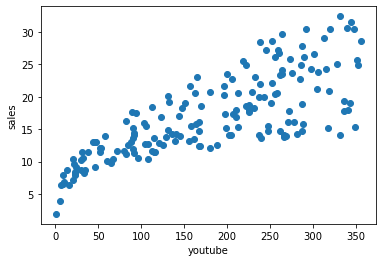

In [14]:
plt.scatter(d.youtube,d.sales)
plt.xlabel('youtube')
plt.ylabel('sales')

15. Create the X and y variables, split the data into training and test sets, train the estimator, and print the RMSE and R squared values.

In [15]:
# youtube
X = d.youtube.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
sales_mean = np.mean(d.sales)
print('Mean Sales:', sales_mean)
print('Percent error:', (RMSE/sales_mean)*100)
print(regr.score(X, y))

Root Mean Squared Error: 3.5315524998893326
Mean Sales: 16.92280701754386
Percent error: 20.86859760457101
0.6102081494052385


16. Plot the linear regression line to show the fit

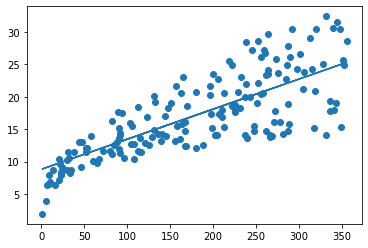

In [16]:
plt.scatter(d.youtube,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_)

17. Do the same 3 steps for facebook data: show the correlation, show how well the estimator works, show the fit

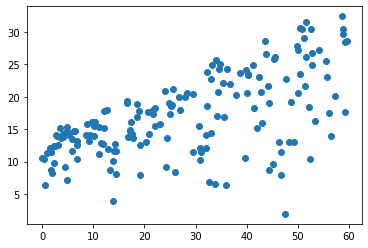

In [17]:
plt.scatter(d.facebook,d.sales) 

In [18]:
# facebook
X = d.facebook.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
sales_mean = np.mean(d.sales)
print('Mean Sales:', sales_mean)
print('Percent error:', (RMSE/sales_mean)*100)
print(regr.score(X, y))

Root Mean Squared Error: 5.193186821772424
Mean Sales: 16.92280701754386
Percent error: 30.687502471597362
0.36248967980691493


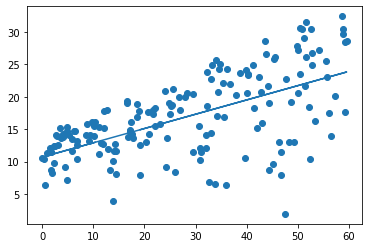

In [19]:
plt.scatter(d.facebook,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_)

18. Do the same 3 steps for facebook data: show the correlation, show how well the estimator works, show the fit

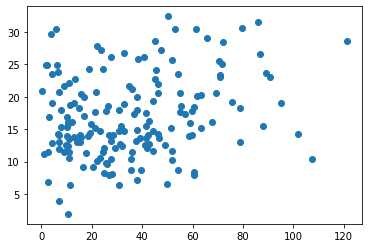

In [20]:
plt.scatter(d.newspaper,d.sales) 

In [21]:
# use newspaper
X = d.newspaper.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
sales_mean = np.mean(d.sales)
print('Mean Sales:', sales_mean)
print('Percent error:', (RMSE/sales_mean)*100)
print(regr.score(X, y))

Root Mean Squared Error: 6.535933819480589
Mean Sales: 16.92280701754386
Percent error: 38.622043096661166
0.061462851818119946


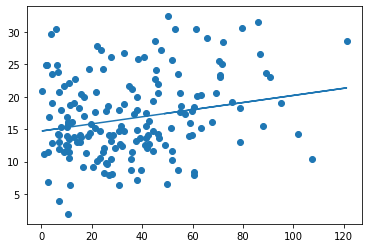

In [22]:
plt.scatter(d.newspaper,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_)

__Multiple linear regression__

In a multiple linear regression or multivariate linear regression, there are multiple X features that could affect the y output. The steps for multiple linear regression is similar to the steps for simple linear regression. The difference is that we can find out which X features affects the output the most, and the relationship between the X features.

19. We look at a small dataset from `homeprices.csv` (from https://www.kaggle.com/pankeshpatel/homepricesmultiplevariables). The data consists of sales prices of homes with certain size (square ft), bedrooms, and age. (The houses in the dataset are definitely from the Bay Area!)

In [23]:
f = pd.read_csv('homeprices.csv') 
print(f.shape)
f

(6, 4)


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


20. Set X to the area and age, and y to the price. Print the size of X and y to check.

In [24]:
X = f[['area','age']]
y = f.price
print(X.shape, y.shape)

(6, 2) (6,)


21. Plot 2 figures side by side to show the correlation of area and price, and of age and price

Text(0, 0.5, 'price')

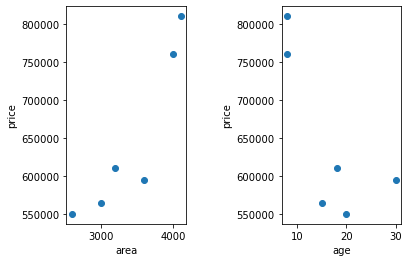

In [25]:
plt.subplot(1,2,1)   # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.8)
plt.scatter(X.area, y)
plt.xlabel('area')
plt.ylabel('price')

plt.subplot(1,2,2)   # 1 row, 2 cols, subplot 1
plt.scatter(X.age, y)
plt.xlabel('age')
plt.ylabel('price')

22. Since there is correlation, split the X and y into training and testing sets. Print the size of the sets to check

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4, 2) (4,) (2, 2) (2,)


23. Train the estimator

In [27]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)

24. The estimator has to find the most optimal coefficients for all the X attributes. We see what coefficients the estimator has chosen.

In [28]:
coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
area,118.640754
age,-4711.980752


We see that the age has more influence on the output than the area. We also see that as the price (the output) goes up, the area also goes up and the age goes down. 

25. Test the estimator and show the result

In [29]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2,610000,606813.919751
5,810000,760710.406199


26. Show the RMSE and R-squared values

In [30]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
priceMean = np.mean(f.price)
print('Attendance mean:', priceMean)
print('Percent error:', RMSE/priceMean*100)
print('R^2:', regr.score(X,y))

Root Mean Squared Error: 34925.74383179127
Attendance mean: 648333.3333333334
Percent error: 5.387004189993512
R^2: 0.929856612389152


__Sample size__

The above example is a simple example of multivariable linear regression, but it is not a good case study because the sample size of 6 is much too small. There are online resources for looking up or calculating sample sizes for linear regression in a particular application, but there are also some general rule of thumbs for sample sizes. For simple linear regression, a sample size of 100 is the minimum, and a size of 400 is generally considered a good size. For multiple regression, a common rule of thumb is 100 + 4 * m, where m is the number of independent variables.